In [5]:
import pandas as pd
import numpy as np

In [7]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52
127,Oil prices in constant 1997 dollars. 1870-1997,NaN


In [8]:
oil_prices = oil_prices[~np.isnan(oil_prices[oil_prices.columns[1]])] 

In [9]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
122,1992,18.38
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52


In [10]:
oil_prices.dtypes

Year                                               object
Oil prices in constant 1997 dollars. 1870-1997    float64
dtype: object

## Year column to be a Python date

In [11]:
oil_prices = oil_prices.convert_objects(convert_dates='coerce')

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [12]:
oil_prices.dtypes

Year                                              datetime64[ns]
Oil prices in constant 1997 dollars. 1870-1997           float64
dtype: object

In [13]:
oil_prices.rename(columns = {oil_prices.columns[1]: 'Oil_Price_1997_Dollars'},inplace=True)

In [14]:
oil_prices.tail()

,Year,Oil_Price_1997_Dollars
122,1992-01-01,18.38
123,1993-01-01,17.15
124,1994-01-01,18.27
125,1995-01-01,19.40
126,1996-01-01,20.52


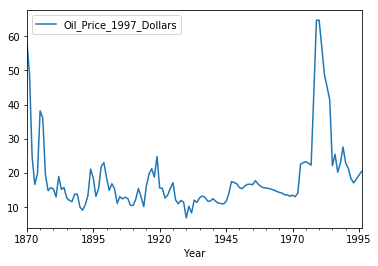

In [16]:
oil_prices.plot(x='Year',y='Oil_Price_1997_Dollars')

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  from ipykernel import kernelapp as app


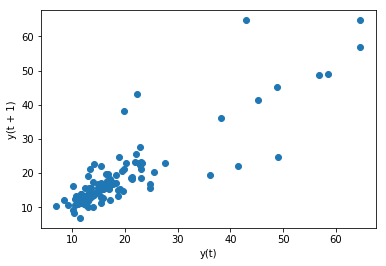

In [17]:
from pandas.tools.plotting import lag_plot
lag_plot(oil_prices.Oil_Price_1997_Dollars)

# The linear pattern here shows that there is some structure in the data, which fits with the fact that year-by-year prices go up or down

# Autocorrelation plot

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  from ipykernel import kernelapp as app


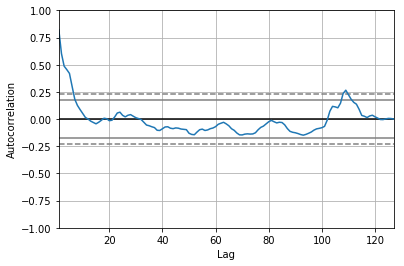

In [18]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(oil_prices['Oil_Price_1997_Dollars'])

## Need to convert the dataset time to date format

In [20]:
car_crashes.Year=car_crashes.Year.astype(str)
car_crashes=car_crashes.convert_objects(convert_dates='coerce')

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [21]:
car_crashes.head()

,Year,Car_Crash_Fatalities_US
0,1900-01-01,36
1,1901-01-01,54
2,1902-01-01,79
3,1903-01-01,117
4,1904-01-01,172


##  Rescale the crash data by dividing by 1000 so that it can be easily viewed on the same axis

In [22]:
car_crashes['Car_Crash_Fatalities_US']=car_crashes['Car_Crash_Fatalities_US']/1000

# Join this data to the oil prices statistics and compare the two trends over time

In [23]:
oil_prices_car_crashes = pd.merge(oil_prices,car_crashes,on='Year')

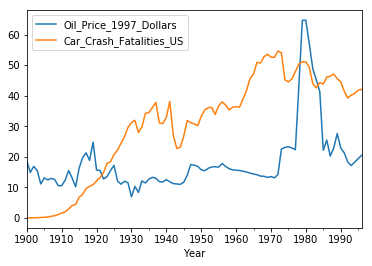

In [24]:
oil_prices_car_crashes.plot(x='Year')

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':


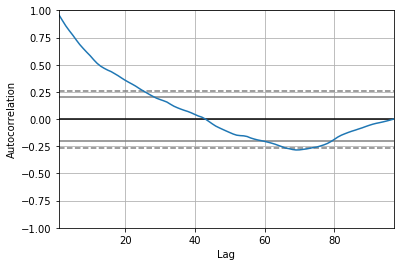

In [25]:
autocorrelation_plot(oil_prices_car_crashes[['Car_Crash_Fatalities_US','Oil_Price_1997_Dollars']])